# Pandas Cookbook

## 9장. Pandas 객체 합치기 

https://github.com/PacktPublishing/Pandas-Cookbook/tree/master/data

### 소개

### DataFrames에 새로운 행 추가

In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd = %pwd
names = pd.read_csv(pwd + '/names.csv')
names.head()

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [3]:
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [4]:
names.loc['five'] = ['Zach', 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [5]:
names.loc[len(names)] = {'Name':'Zayd', 'Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [6]:
names.loc[len(names)] = pd.Series({'Age':32, 'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [7]:
pwd = %pwd
names = pd.read_csv(pwd + '/names.csv')
names.head()

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [8]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [9]:
names.index = ['Canada' , 'Canada', 'USA', 'USA' ]
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2


In [10]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [11]:
s = pd.Series({'Name': 'Zach', 'Age': 3}, name =len(names))
s

Name    Zach
Age        3
Name: 4, dtype: object

In [12]:
names.append(s)

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3


In [13]:
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name =len(names))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name ='USA')
names.append([s1, s2])

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3
USA,Zayd,2


In [14]:
pwd = %pwd
bball_16 = pd.read_csv(pwd + '/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [15]:
data_dict = bball_16.iloc[0].to_dict()
print(data_dict)

{'playerID': 'altuvjo01', 'yearID': 2016, 'stint': 1, 'teamID': 'HOU', 'lgID': 'AL', 'G': 161, 'AB': 640, 'R': 108, 'H': 216, '2B': 42, '3B': 5, 'HR': 24, 'RBI': 96.0, 'SB': 30.0, 'CS': 10.0, 'BB': 60, 'SO': 70.0, 'IBB': 11.0, 'HBP': 7.0, 'SH': 3.0, 'SF': 7.0, 'GIDP': 15.0}


In [16]:
new_data_list = {k: '' if isinstance(v, str) else np.nan for k, v in data_dict.items()}
print(new_data_list)

{'playerID': '', 'yearID': nan, 'stint': nan, 'teamID': '', 'lgID': '', 'G': nan, 'AB': nan, 'R': nan, 'H': nan, '2B': nan, '3B': nan, 'HR': nan, 'RBI': nan, 'SB': nan, 'CS': nan, 'BB': nan, 'SO': nan, 'IBB': nan, 'HBP': nan, 'SH': nan, 'SF': nan, 'GIDP': nan}


In [17]:
random_data = []
for i in range(1000):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v, str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append([pd.Series(d, name = i + len(bball_16))])

In [18]:
random_data[0]

[playerID    d
 yearID      1
 stint       6
 teamID      d
 lgID        b
 G           9
 AB          3
 R           3
 H           9
 2B          2
 3B          5
 HR          8
 RBI         0
 SB          9
 CS          3
 BB          0
 SO          9
 IBB         4
 HBP         4
 SH          6
 SF          1
 GIDP        7
 Name: 16, dtype: object]

In [19]:
%%timeit
bball_16_copy = bball_16.copy()
for row in random_data:
    bball_16_copy = bball_16_copy.append(row)

4.59 s ± 349 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
bball_16_copy = bball_16.copy()
bball_16_copy = bball_16_copy.append(random_data)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


2.83 ms ± 7.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 복수 DataFrames 연결

In [21]:
stocks_2016 = pd.read_csv(pwd+'/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv(pwd+'/stocks_2017.csv', index_col='Symbol') 

In [22]:
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [23]:
pd.concat(s_list, keys=['2016', '2017'], names= ['Years', 'Symbol'])

Shares  Low  High
Years Symbol                   
2016  AAPL        80   95   110
      TSLA        50   80   130
      WMT         40   55    70
2017  AAPL        50  120   140
      GE         100   30    40
      IBM         87   75    95
      SLB         20   55    85
      TXN        500   15    23
      TSLA       100  100   300

In [27]:
pd.concat(s_list, keys=['2016', '2017'], axis = 'columns', names=['Years', None])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


Years   2016                2017              
      Shares   Low   High Shares    Low   High
AAPL    80.0  95.0  110.0   50.0  120.0  140.0
GE       NaN   NaN    NaN  100.0   30.0   40.0
IBM      NaN   NaN    NaN   87.0   75.0   95.0
SLB      NaN   NaN    NaN   20.0   55.0   85.0
TSLA    50.0  80.0  130.0  100.0  100.0  300.0
TXN      NaN   NaN    NaN  500.0   15.0   23.0
WMT     40.0  55.0   70.0    NaN    NaN    NaN

In [28]:
pd.concat(s_list, join='inner', keys = ['2016', '2017'], axis = 'columns', names = ['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

In [29]:
stocks_2016.append(stocks_2017)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


### 트럼프와 오바마 대통령 국정 수행 능력 평가 비교

In [32]:
base_url = 'http://presidency.ucsb.edu/data/popularity.php?pres={}'
trump_url = base_url.format(45)
df_list = pd.read_html(trump_url)
len(df_list)

14

In [33]:
df0 = df_list[0]
df0.shape

(130, 541)

In [34]:
df0.head(7)

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
0,NaN,NaN,** NOTE: The American Presidency Project will ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,** NOTE: The American Presidency Project will ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,** NOTE: The American Presidency Project will ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,** NOTE: The American Presidency Project will ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_list = pd.read_html(trump_url, match='Start Date')
len(df_list)

3

In [36]:
df_list = pd.read_html(trump_url, match = 'Start Date', attrs = {'align':'center'})
len(df_list)

1

In [38]:
trump = df_list[0]
trump.shape

(70, 19)

In [39]:
trump.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,>84 84-67 66-55 54-50 49-45 44-40 39-35 ...,>84,84-67,66-55,54-50,49-45,44-40,39-35,34-25,<25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,>84,84-67,66-55,54-50,49-45,44-40,39-35,34-25,<25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,%,%,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,President,Start Date,End Date,NaN,Approving,Disapproving,unsure/no data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Donald J. Trump,04/09/2018,04/15/2018,NaN,39,55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,04/02/2018,04/08/2018,NaN,41,54,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_list = pd.read_html(trump_url, match = 'Start Date', attrs ={'align':'center'}, header = 0, skiprows=[0,1,2,3,5], parse_dates = ['Start Date', 'End Date'])
trump = df_list[0]
trump.head()

,President,Start Date,End Date,Unnamed: 3,Approving,Disapproving,unsure/no data,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Donald J. Trump,2018-04-09,2018-04-15,NaN,39,55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2018-04-02,2018-04-08,NaN,41,54,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2018-03-26,2018-03-31,NaN,39,55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2018-03-19,2018-03-25,NaN,39,55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2018-03-12,2018-03-18,NaN,40,56,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
trump = trump.dropna(axis = 1, how = 'all')
trump.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Donald J. Trump,2018-04-09,2018-04-15,39,55,6
1,NaN,2018-04-02,2018-04-08,41,54,5
2,NaN,2018-03-26,2018-03-31,39,55,6
3,NaN,2018-03-19,2018-03-25,39,55,6
4,NaN,2018-03-12,2018-03-18,40,56,4


In [46]:
trump.isnull().sum()

President         63
Start Date         0
End Date           0
Approving          0
Disapproving       0
unsure/no data     0
dtype: int64

In [48]:
trump = trump.ffill()
trump.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Donald J. Trump,2018-04-09,2018-04-15,39,55,6
1,Donald J. Trump,2018-04-02,2018-04-08,41,54,5
2,Donald J. Trump,2018-03-26,2018-03-31,39,55,6
3,Donald J. Trump,2018-03-19,2018-03-25,39,55,6
4,Donald J. Trump,2018-03-12,2018-03-18,40,56,4


In [51]:
trump.dtypes

President                 object
Start Date        datetime64[ns]
End Date          datetime64[ns]
Approving                  int64
Disapproving               int64
unsure/no data             int64
dtype: object

In [56]:
def get_pres_appr(pres_num):
    base_url = 'http://presidency.ucsb.edu/data/popularity.php?pres={}'
    pres_url = base_url.format(pres_num)
    df_list = pd.read_html(pres_url, match='Start Date', attrs = {'align':'center'}, header = 0, skiprows=[0,1,2,3,5], parse_dates = ['Start Date', 'End Date'])
    pres = df_list[0].copy()
    pres = pres.dropna(axis = 1, how = 'all')
    pres['President'] = pres['President'].ffill()
    return pres.sort_values('End Date').reset_index(drop = True)

In [57]:
obama = get_pres_appr(44)
obama.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Barack Obama,2009-01-21,2009-01-23,68,12,21
1,Barack Obama,2009-01-22,2009-01-24,69,13,18
2,Barack Obama,2009-01-23,2009-01-25,67,14,19
3,Barack Obama,2009-01-24,2009-01-26,65,15,20
4,Barack Obama,2009-01-25,2009-01-27,64,16,20


In [58]:
pres_41_45 = pd.concat([get_pres_appr(x) for x in range(41, 46)], ignore_index=True)
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,George Bush,1989-01-24,1989-01-26,51,6,43
1,George Bush,1989-02-24,1989-02-27,60,11,27
2,George Bush,1989-02-28,1989-03-02,62,13,24
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15
386,George W. Bush,2001-02-01,2001-02-04,57,25,18
387,George W. Bush,2001-02-09,2001-02-11,57,24,17
388,George W. Bush,2001-02-19,2001-02-21,61,21,16
656,Barack Obama,2009-01-21,2009-01-23,68,12,21


In [59]:
pres_41_45['End Date'].value_counts().head(8)

1990-03-11    2
1990-08-12    2
1990-08-26    2
1999-02-09    2
1992-11-22    2
2013-10-10    2
1990-05-22    2
2005-01-05    1
Name: End Date, dtype: int64

In [60]:
pres_41_45 = pres_41_45.drop_duplicates(subset = 'End Date')

In [62]:
pres_41_45.shape

(3500, 6)

In [63]:
pres_41_45['President'].value_counts()

Barack Obama          2786
George W. Bush         270
William J. Clinton     227
George Bush            153
Donald J. Trump         64
Name: President, dtype: int64

In [65]:
pres_41_45.groupby('President',  sort=False).median().round(1)

,Approving,Disapproving,unsure/no data
President,,,
George Bush,62.0,22.0,9.0
William J. Clinton,57.0,36.0,6.0
George W. Bush,50.5,45.5,4.0
Barack Obama,47.0,47.0,7.0
Donald J. Trump,38.0,56.0,5.0


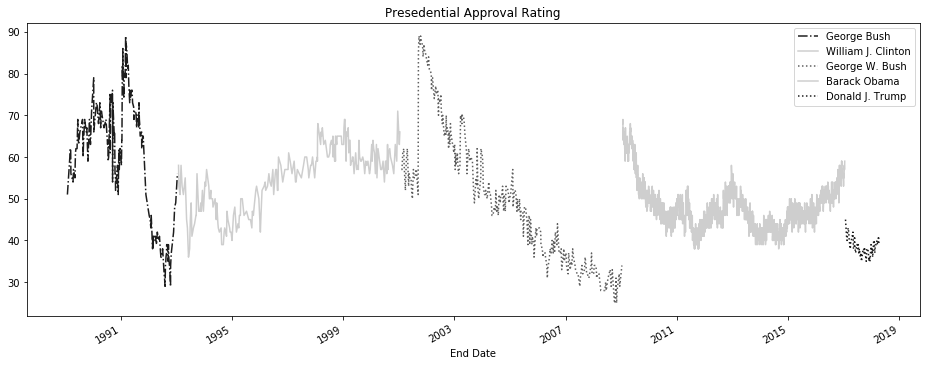

In [95]:
from matplotlib import cm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16, 6))

styles = ['-.','-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
groups = pres_41_45.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 'Approving', ax =ax , label = pres, style =style, color = cm.Greys(color), title = 'Presedential Approval Rating')

In [96]:
days_func = lambda x: x - x.iloc[0]
pres_41_45['Days in Office'] = pres_41_45.groupby('President')['End Date'].transform(days_func)
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data,Days in Office
0,George Bush,1989-01-24,1989-01-26,51,6,43,0 days
1,George Bush,1989-02-24,1989-02-27,60,11,27,32 days
2,George Bush,1989-02-28,1989-03-02,62,13,24,35 days
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22,0 days
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16,5 days
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15,19 days
386,George W. Bush,2001-02-01,2001-02-04,57,25,18,0 days
387,George W. Bush,2001-02-09,2001-02-11,57,24,17,7 days
388,George W. Bush,2001-02-19,2001-02-21,61,21,16,17 days
656,Barack Obama,2009-01-21,2009-01-23,68,12,21,0 days


In [97]:
pres_41_45.dtypes

President                  object
Start Date         datetime64[ns]
End Date           datetime64[ns]
Approving                   int64
Disapproving                int64
unsure/no data              int64
Days in Office    timedelta64[ns]
dtype: object

In [98]:
pres_41_45['Days in Office'] = pres_41_45['Days in Office'].dt.days

pres_41_45['Days in Office'].head()

0     0
1    32
2    35
3    43
4    46
Name: Days in Office, dtype: int64

In [99]:
pres_pivot = pres_41_45.pivot(index = 'Days in Office', columns='President', values ='Approving')

In [100]:
pres_pivot.head()

President,Barack Obama,Donald J. Trump,George Bush,George W. Bush,William J. Clinton
Days in Office,,,,,
0,68.0,45.0,51.0,57.0,58.0
1,69.0,NaN,NaN,NaN,NaN
2,67.0,NaN,NaN,NaN,NaN
3,65.0,NaN,NaN,NaN,NaN
4,64.0,NaN,NaN,NaN,NaN


In [101]:
plot_kwargs = dict(figsize = (16, 6), color = cm.gray([.3, .7]), style=['-', '--'], title = 'Approval Rating')

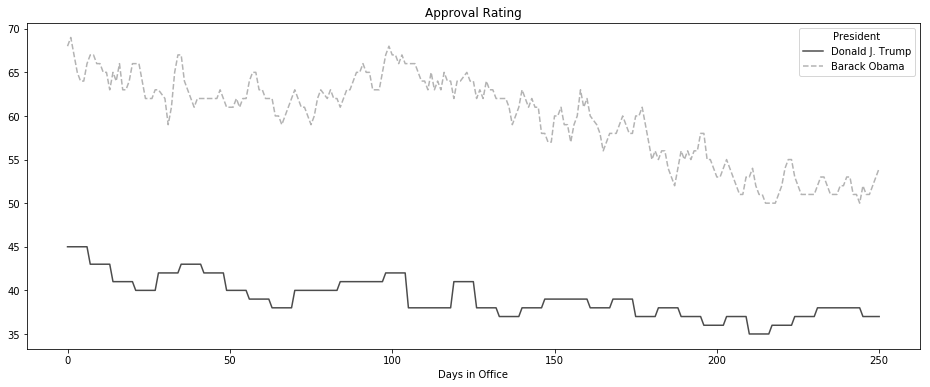

In [102]:
pres_pivot.loc[:250, ['Donald J. Trump', 'Barack Obama']].ffill().plot(**plot_kwargs)

In [105]:
pres_rm = pres_41_45.groupby('President', sort = False).rolling('90D', on = 'End Date')['Approving'].mean()
pres_rm.head()

President    End Date  
George Bush  1989-01-26    51.000000
             1989-02-27    55.500000
             1989-03-02    57.666667
             1989-03-10    58.750000
             1989-03-13    58.200000
Name: Approving, dtype: float64

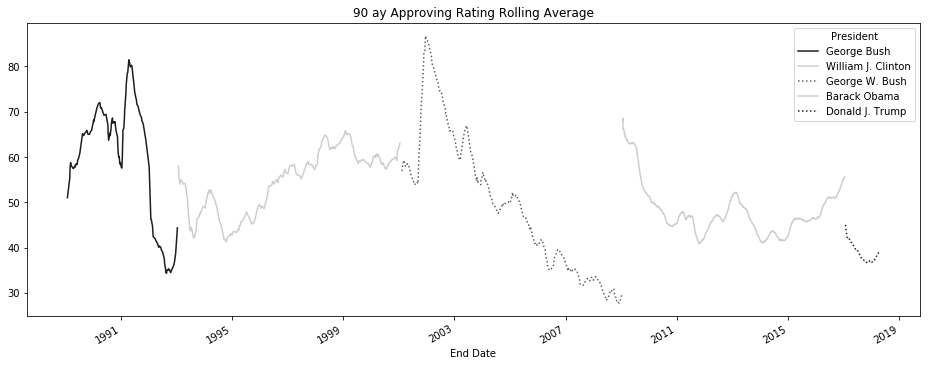

In [107]:
styles = ['-', '-', ':','-',':']
colors = [.9, .3, .7, .3, .9]
color = cm.Greys(colors)
title = '90 ay Approving Rating Rolling Average'
plot_kwargs = dict(figsize = (16, 6), style = styles, color = color, title = title)
correct_col_order = pres_41_45.President.unique()
pres_rm.unstack('President')[correct_col_order].plot(**plot_kwargs)

- matplotlib 의 컬러맵 : https://matplotlib.org/examples/color/colormaps_reference.html
- date offsets의 리스트와 별칭 기호 : http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### concat, join, merge 사이의 차이점 이해하기

### SQL 데이터베이스에 연결